In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

Using TensorFlow backend.
/Users/cristian/.envs/jupyter/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


We need to generate the data to use input/labels for the neural network.
Let's start with that.

We have x as input (size 1) and y as output (size 1).

In [12]:
X_train = np.linspace(0, 20, 2000) # Change to a higher resolution to have better results
y_train = np.array([np.sin(x) for x in X_train])

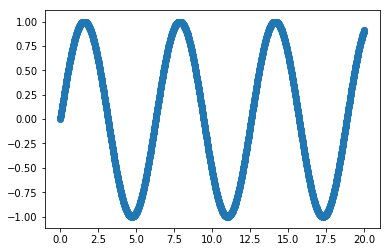

In [13]:
plt.scatter(X_train, y_train)
plt.show()

Start by creating the sequential model in keras

In [20]:
model = Sequential()

Now, we add the layers to the model

In [21]:
model.add(Dense(5, input_shape=(1,)))
model.add(Dense(20, activation='relu')) # Play with values: i.e. 1, 10, 100. Try also adding new layers.
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='linear'))

The model needs to be "compiled" before being trained

In [22]:
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[soft_acc])

Now we can train it and monitor it's progress.

In [23]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2000/2000 [==============================] - 1s 382us/step - loss: 0.4999 - soft_acc: 0.3435
Epoch 2/20
2000/2000 [==============================] - 0s 89us/step - loss: 0.4349 - soft_acc: 0.4105
Epoch 3/20
2000/2000 [==============================] - 0s 89us/step - loss: 0.4037 - soft_acc: 0.4405
Epoch 4/20
2000/2000 [==============================] - 0s 91us/step - loss: 0.3609 - soft_acc: 0.4805
Epoch 5/20
2000/2000 [==============================] - 0s 88us/step - loss: 0.3241 - soft_acc: 0.5290
Epoch 6/20
2000/2000 [==============================] - 0s 88us/step - loss: 0.3219 - soft_acc: 0.5035
Epoch 7/20
2000/2000 [==============================] - 0s 88us/step - loss: 0.2953 - soft_acc: 0.5500
Epoch 8/20
2000/2000 [==============================] - 0s 88us/step - loss: 0.2627 - soft_acc: 0.6120
Epoch 9/20
2000/2000 [==============================] - 0s 88us/step - loss: 0.2591 - soft_acc: 0.5910
Epoch 10/20
2000/2000 [==============================] - 0s 89us/step - 

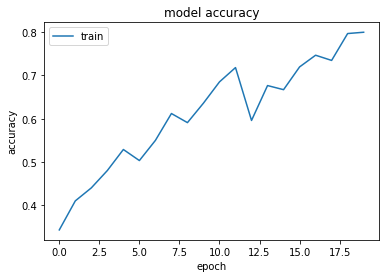

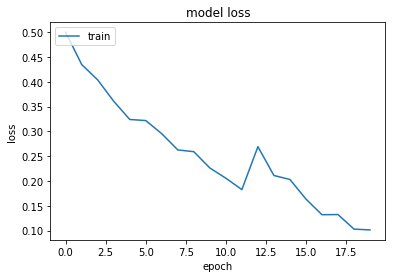

In [24]:
plt.plot(history.history['soft_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

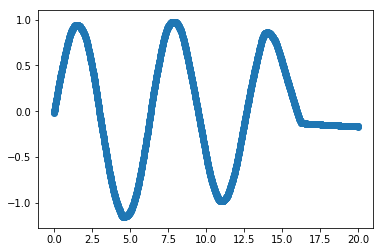

In [25]:
y_predicted = model.predict(X_train)
plt.scatter(X_train, y_predicted)
plt.show()

In [ ]:
X_train = np.linspace(-20, 0, 2000)
y_predicted = model.predict(X_train)
plt.scatter(X_train, y_predicted)
plt.show()